<a href="https://colab.research.google.com/github/Cerrat0/m6_churn_prediction/blob/master/Modulo_5_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![texto alternativo](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2017/07/customer-churn-edit.jpeg)

# Módulo 5 (trabajo-individual) CHURN PREDICTION 
Modelo no supervisado
para identificación de clientes que abandonan la empresa 







# 00.Descripción de las variables del dataset 
***Cada fila representa un cliente, cada columna contiene atributos de cliente
descritos en la columna Metadata.
Los datos brutos contienen 7043 filas (clientes) y 21 columnas
(variables/atributos)..***
> ### Datos de cada columna:
* **1. CustomerID (Alfanumérica):** Customer ID
* **2. Gender (Alfanumérica)** si el clientes es hombre se codifica con “male” y si
es mujer con “female”
* **3. SeniorCitizen (numérica):** si el cliente es senior o no (1,0)
* **4. Partner (Alfanumérica):** Si el cliente tiene un partner o no (Yes,No).
* **5.	Dependents (Alfanumérica):** si el cliente tiene dependientes o no (yes,No).
* **6.	Ternure (numérica):** Número de meses que el cliente ha estado en la compañía
* **7.	PhoneService (Alfanumérica):** Si el cliente tiene un servicio móvil o no
(Yes,No)
* **8.	MultipleLines (Alfanumérica):** Si el cliente tiene multiples líneas (Yes, No, No pone service)
* **9.	InternetService:**  Proveedor de servicio de internet del cliente (DSL,Fiber optic, No)
* **10.	OnlineSecurity (Alfanumérica):**  Si el cliente tiene seguridad online o no (Yes,No, No internet service)
* **11.	OnlineBackup (Alfanumérica):**  Si el cliente tiene backup online o no (Yes,No, No internet service).
* **12.	DeviceProtection (Alfanumérica):** Si el cliente tiene protección para el sispositivo o no (Yes, No, No internet service)
* **13.	TechSupport(Alfanumérica):** Si el cliente tien soporte o no (Yes, No, No internet service)
* **14.	StreamingTV (Alfanumérica):** Si el cliente tiene TV en streaming o no (Yes, No, No internet sercice)
* **15.	StreamingMovies (Alfanumérica) :**). Si el cliente tiene películas en streaming o no (Yes, No, No internet service)
* **16.	Contract (Alfanumérica):** Los términos del contrato del cliente. (Month-to- Month, One year, Two year)
* **17.	PaperlessBilling (Alfanumérica) :** Si el cliente tiene factura digital o no (Yes, No)
* **18.	PaymentMethod (Alfanumérica):** El método de pago del cliente. (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
* **19.	MonthlyCharges (numérica):** ). La cantidad cargada por el cliente mensualmente
* **20.	TotalCharges (numérica):** La cantidad total cargada al cliente
* **21.	Churn (Alfanumérica):** Si el cliente se ha ido de la compañía o no (Yes o No)

# 01.Load Data

In [1]:
#Cargamos las librerías que utilizaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from xgboost import XGBClassifier


#Cargamos el dataset y printamos las 10 primeras columnas
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', sep = ',')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# 02.Exploratory Data Analysis

Una vez imprimidas las cabeceras del dataset, exploramos el tipo de variables que contiene el dataset.

In [2]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Con cada una de las variables realizaremos histogramas, por un lado de todo el dataset y con la misma variable lo graficaremos en base a si es churn o no, para tratar de encontrar variables que se comporten diferente

##Variable target: Churn

Lo primero que deberemos entender es la distribución que tiene la variable objetivo y si esta muestra es representativa para poder hacer analítica y posterior modelado en base a ella o deberemos hacer más transformaciones.

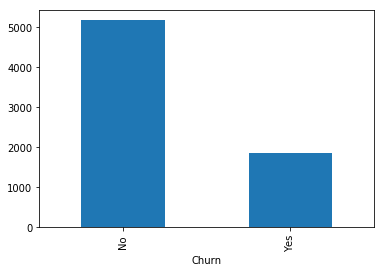

In [3]:
df.groupby('Churn').size().plot(kind = 'bar')

El porcentaje de clientes churn es superior al 25%, por lo que no considero necesario más transformaciones pues tendremos, muestra suficiente para analizar y entrenar los modelos, aunque sería ideal que el dataset contuviese más registros.

##Variables categóricas

###Gender

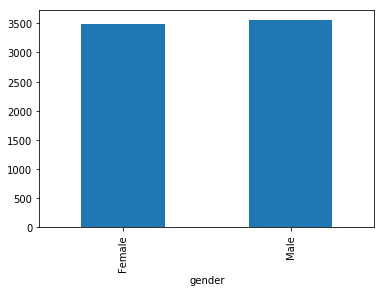

In [4]:
df.groupby('gender').size().plot(kind = 'bar')

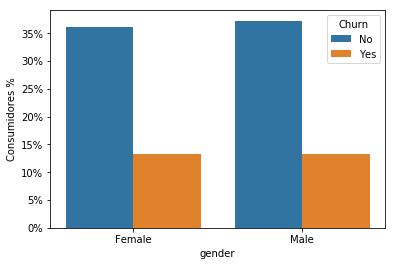

In [5]:
def dob_histogram_gender(feature, orient='v', axis_name="Consumidores %"):
    ratios = pd.DataFrame()
    his = df.groupby(feature)["Churn"].value_counts().to_frame()
    his = his.rename({"Churn": axis_name}, axis=1).reset_index()
    his[axis_name] = his[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=his, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=his, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
dob_histogram_gender("gender")


A primera vista **gender** no parece ser una variable que determine el churn

###SeniorCitizen


Esta variable toma valores numéricos, pero la variable en si mismo es de tipo categórica, por lo que realizaremos una transformación de esta.

In [0]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype(object)

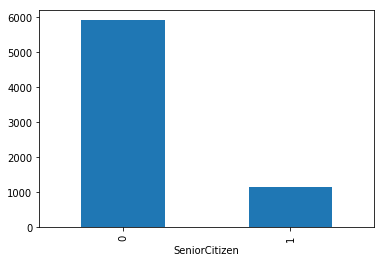

In [7]:
df.groupby('SeniorCitizen').size().plot(kind = 'bar')

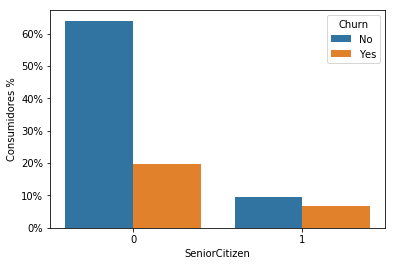

In [8]:
def dob_histogram_gender(feature, orient='v', axis_name="Consumidores %"):
    ratios = pd.DataFrame()
    his = df.groupby(feature)["Churn"].value_counts().to_frame()
    his = his.rename({"Churn": axis_name}, axis=1).reset_index()
    his[axis_name] = his[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=his, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=his, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
dob_histogram_gender("SeniorCitizen")

Aunque el peso de los **SeniorCitizen**  = 1 es bajo, cuando distinguimos entre ser churn o no, con SeniorCitizen = 1 observamos que esta repartido de forma muy igualitaria, aunque de momento es poco esclarecedor y poco representativo

###Partner

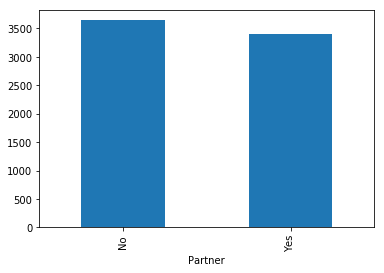

In [9]:
df.groupby('Partner').size().plot(kind = 'bar')

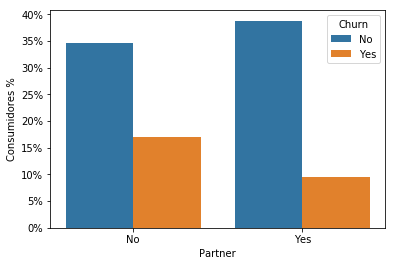

In [10]:
def dob_histogram_gender(feature, orient='v', axis_name="Consumidores %"):
    ratios = pd.DataFrame()
    his = df.groupby(feature)["Churn"].value_counts().to_frame()
    his = his.rename({"Churn": axis_name}, axis=1).reset_index()
    his[axis_name] = his[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=his, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=his, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
dob_histogram_gender("Partner")

Para la variable Partner, está repartida de manera muy equitativa, sin embargo no encontramos grandes diferencias cuando incluimos en los histogramas la variable Churn

###Dependents

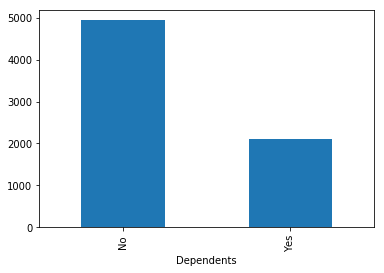

In [11]:
df.groupby('Dependents').size().plot(kind = 'bar')

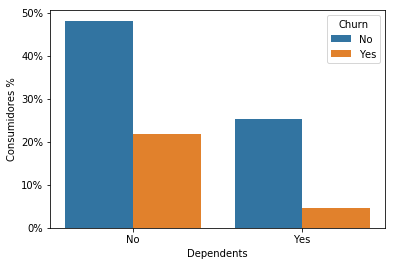

In [12]:
def dob_histogram_gender(feature, orient='v', axis_name="Consumidores %"):
    ratios = pd.DataFrame()
    his = df.groupby(feature)["Churn"].value_counts().to_frame()
    his = his.rename({"Churn": axis_name}, axis=1).reset_index()
    his[axis_name] = his[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=his, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=his, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
dob_histogram_gender("Dependents")

###PhoneService


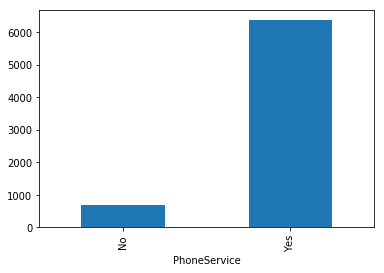

In [13]:
df.groupby('PhoneService').size().plot(kind = 'bar')

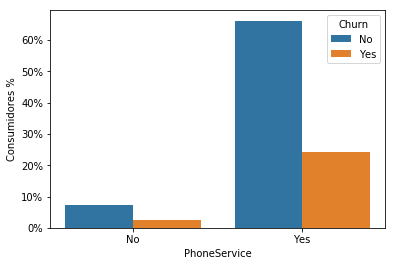

In [14]:
def dob_histogram_gender(feature, orient='v', axis_name="Consumidores %"):
    ratios = pd.DataFrame()
    his = df.groupby(feature)["Churn"].value_counts().to_frame()
    his = his.rename({"Churn": axis_name}, axis=1).reset_index()
    his[axis_name] = his[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=his, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=his, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
dob_histogram_gender("PhoneService")

La variable PhoneService es escasa en el dataset y además cuando introducimos la variable Churn no atisvamos diferentes comportamientos

###MultipleLines

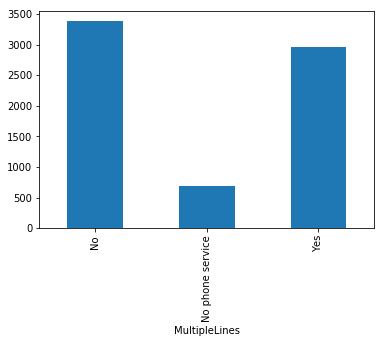

In [15]:
df.groupby('MultipleLines').size().plot(kind = 'bar')

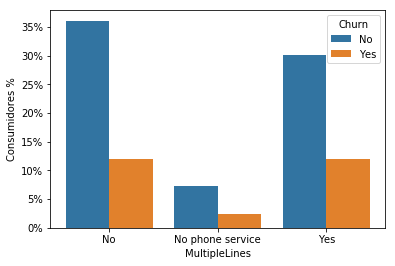

In [16]:
def dob_histogram_gender(feature, orient='v', axis_name="Consumidores %"):
    ratios = pd.DataFrame()
    his = df.groupby(feature)["Churn"].value_counts().to_frame()
    his = his.rename({"Churn": axis_name}, axis=1).reset_index()
    his[axis_name] = his[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=his, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=his, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
dob_histogram_gender("MultipleLines")

En este caso contamos con tres posibles valores para la variables MultipleLines, donde los predominantes son "Yes" y "No" casi de manera equitativa, mientras que el valor "No phones service" es el minoritario. Respecto a su distribución en función del Churn, en un primer análisis no parece determinante. 

###InternetService

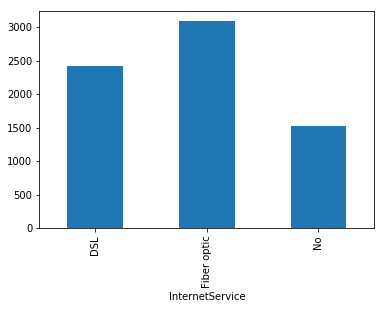

In [17]:
df.groupby('InternetService').size().plot(kind = 'bar')

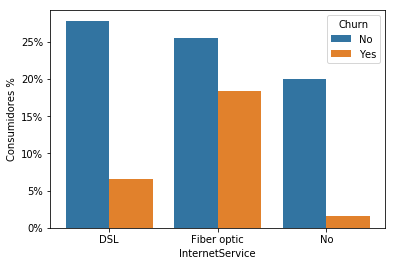

In [18]:
def dob_histogram_gender(feature, orient='v', axis_name="Consumidores %"):
    ratios = pd.DataFrame()
    his = df.groupby(feature)["Churn"].value_counts().to_frame()
    his = his.rename({"Churn": axis_name}, axis=1).reset_index()
    his[axis_name] = his[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=his, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=his, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
dob_histogram_gender("InternetService")

Para la variable InternetService, el valor predominante es "Fiber optic", pero más haya de esto se observa como los clientes de fibra tienen mayor propension al churn, sobre todo si lo contrastamos con "DSL" y "No".

###OnlineSecurity

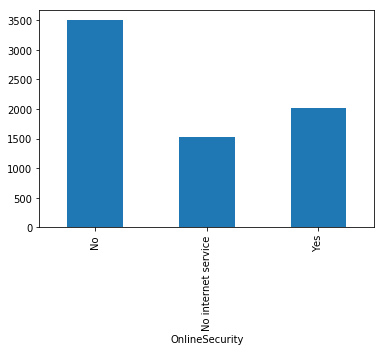

In [19]:
df.groupby('OnlineSecurity').size().plot(kind = 'bar')

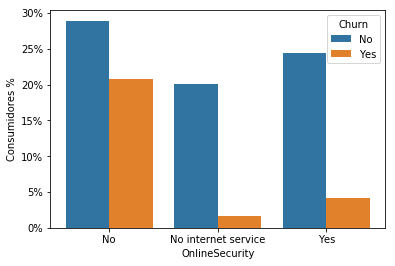

In [20]:
def dob_histogram_gender(feature, orient='v', axis_name="Consumidores %"):
    ratios = pd.DataFrame()
    his = df.groupby(feature)["Churn"].value_counts().to_frame()
    his = his.rename({"Churn": axis_name}, axis=1).reset_index()
    his[axis_name] = his[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=his, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=his, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
dob_histogram_gender("OnlineSecurity")

En este histograma se aprecia como para los clientes de OnlineSecurity con valor "Yes", parecen más fieles a priori que los clientes con valor "No", esto tiene mucho sentido pues parecen ser productos adicionales de seguridad que adquieren los clientes y con esto son más afines a la compañia. 
Llama la atención como para el valor "No internet service" los Churn también son muy bajos, esto podría ir en linea con la hipótesis de que los clientes Churn son más propensos a cambiar de compañia en base a sus condiciones de internet, mientras que clientes sin este servicio están más despreocupados de ir cambiando entre compañias. 

###OnlineBackup

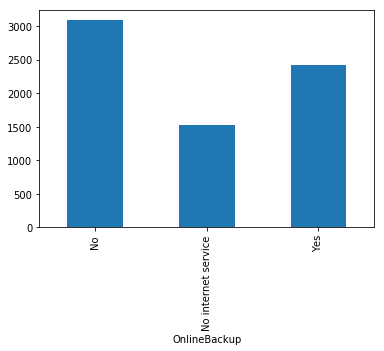

In [21]:
df.groupby('OnlineBackup').size().plot(kind = 'bar')

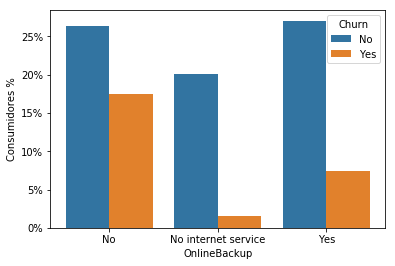

In [22]:
def dob_histogram_gender(feature, orient='v', axis_name="Consumidores %"):
    ratios = pd.DataFrame()
    his = df.groupby(feature)["Churn"].value_counts().to_frame()
    his = his.rename({"Churn": axis_name}, axis=1).reset_index()
    his[axis_name] = his[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=his, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=his, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
dob_histogram_gender("OnlineBackup")

Distribución similar a la variable anterior, mismas conclusiones.

###DeviceProtection

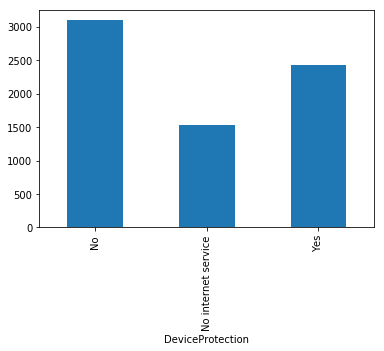

In [23]:
df.groupby('DeviceProtection').size().plot(kind = 'bar')

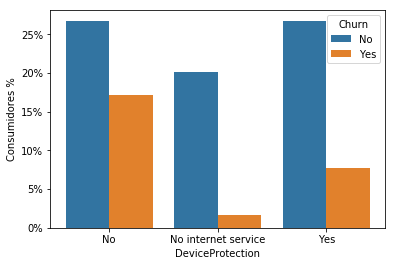

In [24]:
def dob_histogram_gender(feature, orient='v', axis_name="Consumidores %"):
    ratios = pd.DataFrame()
    his = df.groupby(feature)["Churn"].value_counts().to_frame()
    his = his.rename({"Churn": axis_name}, axis=1).reset_index()
    his[axis_name] = his[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=his, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=his, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
dob_histogram_gender("DeviceProtection")

Distribución similar a las dos anteriores, además de tomar peso la hipótesis de que los clientes churn son los que se mueven en base de ofertas de internet, cuando no contratado packs con más servicios.

###TechSupport

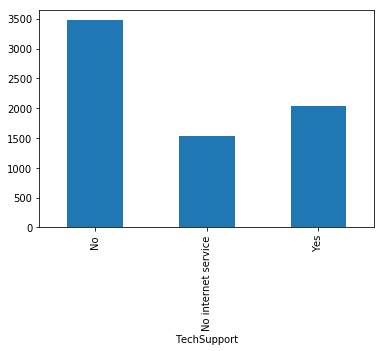

In [25]:
df.groupby('TechSupport').size().plot(kind = 'bar')

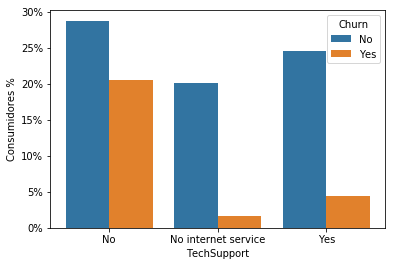

In [26]:
def dob_histogram_gender(feature, orient='v', axis_name="Consumidores %"):
    ratios = pd.DataFrame()
    his = df.groupby(feature)["Churn"].value_counts().to_frame()
    his = his.rename({"Churn": axis_name}, axis=1).reset_index()
    his[axis_name] = his[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=his, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=his, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
dob_histogram_gender("TechSupport")

Mismas conclusiones, además comienza a intuirse de que esta clase de servicios van en un mismo pack dado que las distribuciones y los pesos de los clientes son muy similares entre ellos, por lo que más adelante realizaremos análisis de correlación en base a estas variables, para valorar esta hipótesis.

###StreamingTV

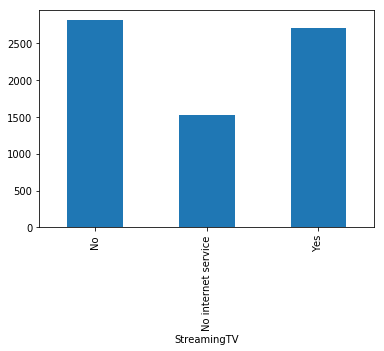

In [27]:
df.groupby('StreamingTV').size().plot(kind = 'bar')

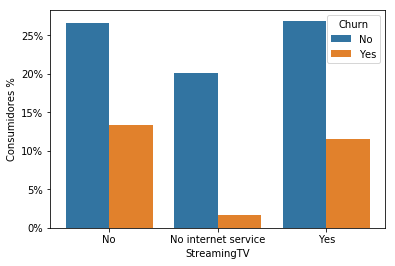

In [28]:
def dob_histogram_gender(feature, orient='v', axis_name="Consumidores %"):
    ratios = pd.DataFrame()
    his = df.groupby(feature)["Churn"].value_counts().to_frame()
    his = his.rename({"Churn": axis_name}, axis=1).reset_index()
    his[axis_name] = his[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=his, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=his, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
dob_histogram_gender("StreamingTV")

###StreamingMovies

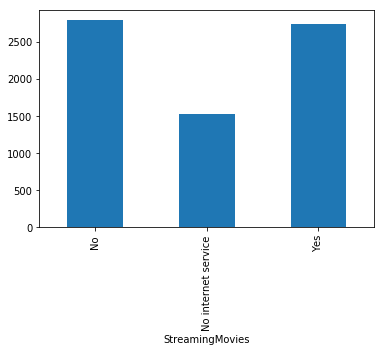

In [29]:
df.groupby('StreamingMovies').size().plot(kind = 'bar')

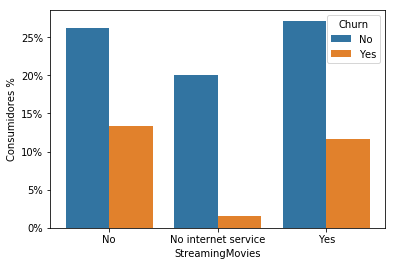

In [30]:
def dob_histogram_gender(feature, orient='v', axis_name="Consumidores %"):
    ratios = pd.DataFrame()
    his = df.groupby(feature)["Churn"].value_counts().to_frame()
    his = his.rename({"Churn": axis_name}, axis=1).reset_index()
    his[axis_name] = his[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=his, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=his, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
dob_histogram_gender("StreamingMovies")

Las variables OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies han dejado el feeling de que son variables correlacionadas pues tienen todas, practicamente, la misma distribución en el dataset, parece ser que se ofrecen en el mismo pack, más adelante corroboraremos esta hipótesis.

###Contract

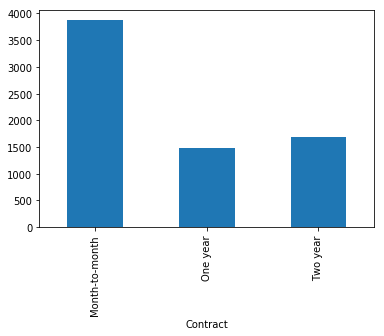

In [31]:
df.groupby('Contract').size().plot(kind = 'bar')

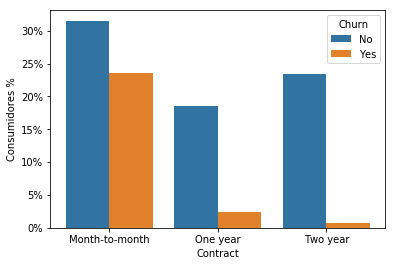

In [32]:
def dob_histogram_gender(feature, orient='v', axis_name="Consumidores %"):
    ratios = pd.DataFrame()
    his = df.groupby(feature)["Churn"].value_counts().to_frame()
    his = his.rename({"Churn": axis_name}, axis=1).reset_index()
    his[axis_name] = his[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=his, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=his, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
dob_histogram_gender("Contract")

Muy ilustrador este histograma, mostrando como los clientes de contrato month-to-month son mucho más propensos a abandonar la teleoperadora a los clientes con contrato anual o bianual. Desde un punto de vista de negocio, puede que los clientes con contratos anuales tengan penalizaciones a si dejan la operadora antes de finalizar el contrato.

###PaperlessBilling

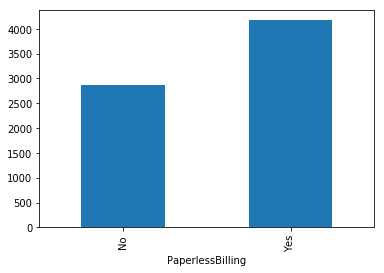

In [33]:
df.groupby('PaperlessBilling').size().plot(kind = 'bar')

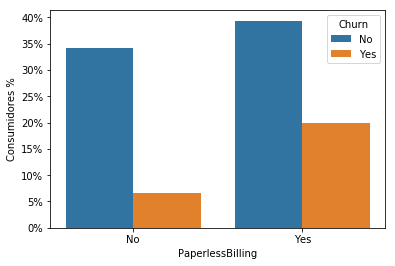

In [34]:
def dob_histogram_gender(feature, orient='v', axis_name="Consumidores %"):
    ratios = pd.DataFrame()
    his = df.groupby(feature)["Churn"].value_counts().to_frame()
    his = his.rename({"Churn": axis_name}, axis=1).reset_index()
    his[axis_name] = his[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=his, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=his, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
dob_histogram_gender("PaperlessBilling")

La distribución de esta variable puede estar ligada a la hipótesis de que un cliente con factura digital es un cliente más conectado y con mayor acceso a internet, por tanto tendrá más capacidad de buscar ofertas y/o recibirlas por parte de otras operadoras. 

Deberíamos conocer cual es la opción por defecto cuando un cliente contrata, pues es probable que esto este alterando la variable y por eso las diferencias sean limitadas.

###PaymentMethod

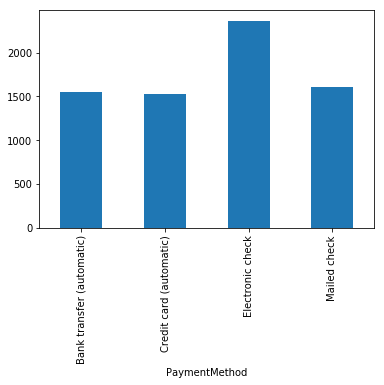

In [35]:
df.groupby('PaymentMethod').size().plot(kind = 'bar')

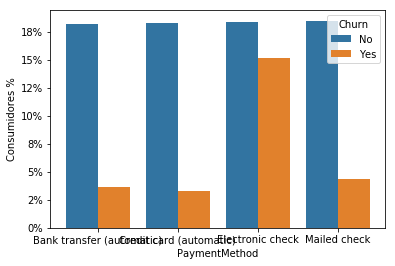

In [36]:
def dob_histogram_gender(feature, orient='v', axis_name="Consumidores %"):
    ratios = pd.DataFrame()
    his = df.groupby(feature)["Churn"].value_counts().to_frame()
    his = his.rename({"Churn": axis_name}, axis=1).reset_index()
    his[axis_name] = his[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=his, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=his, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
dob_histogram_gender("PaymentMethod")

Distribución similar de los distintos valores a eexcepción de Electronic check, el cual es el predominante, además parece ser que es el valor con el porcentaje más alto de churns, pues parece que los métodos de pago no automáticos son más frecuentes en los clientes churn.

##Variables numéricas

En primera instancia al hacer un descriptivo de las variables numéricas observamos que TotalCharges es tratada como object, a pesar de considerar que es una variable de tipo numérica, al intentar transformarla, ha dado error, explorando más exhaustivamente esta variable observamos que tiene valores como vacios, por lo que para trasformarla posteriormente en float, remplazaremos los varios por null.

In [0]:
df['TotalCharges'] = df["TotalCharges"].replace(" ", 0)

In [0]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [39]:
  df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


###Tenure

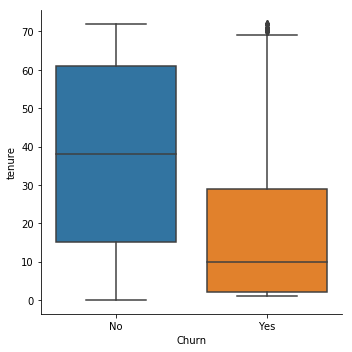

In [40]:
ax = sns.catplot(x="Churn",y="tenure", kind="box", data=df)

Se observa claramente como los clientes churn son aquellos que han permanecido poco tiempo en la operadora, contando con una media entorno a los 10 meses, mientras que los clientes NO churn tienen media de 40 meses y su distribución es más dispersa, entre 15 y 60 meses

###MonthlyCharges

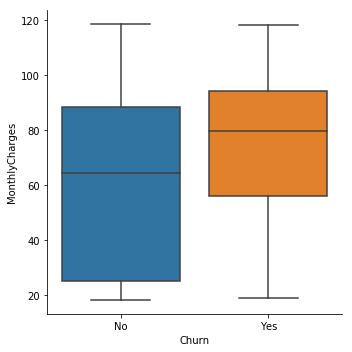

In [41]:
ax = sns.catplot(x="Churn",y="MonthlyCharges", kind="box", data=df)

Del histograma extraemos conclusiones como el hecho de que los clientes churn frecuentemente pagan más

###TotalCharges

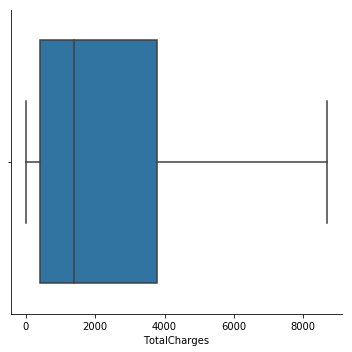

In [42]:
ax = sns.catplot(x="TotalCharges",kind="box", data=df)

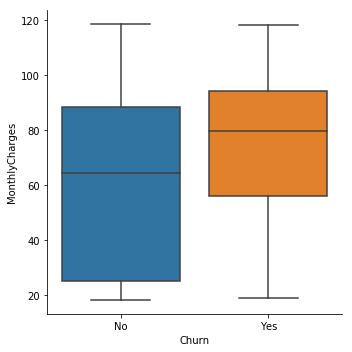

In [43]:
ax = sns.catplot(x="Churn",y="MonthlyCharges", kind="box", data=df)

Esta variable esta muy correlada con tenure, pues cuanto más tiempo lleve un cliente en la operadora, más habrá pagado a lo largo de su historia y puesto que los clientes NO churn llevan más tiempo en la teleoperadora por ese motivo el TotalCharges de estos es mayor.

Por otro lado observamos algunos clientes Churn parecen estar alejados del tercer cuartil, pero dado que el maximo de TotalCharges es 8684.8 no parecen ser outliers, además, cuando hemos ejecutado el boxplot unicamente para la variable TotalCharges (sin tener en cuenta Churn) no se encontraron outliers, por lo tanto excluirlos ahora podría ser un error.

# 03.Correlation Analysis 

##Variables categoricas: Correlation heatmap

In [0]:
df_categoricas = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', sep = ',')


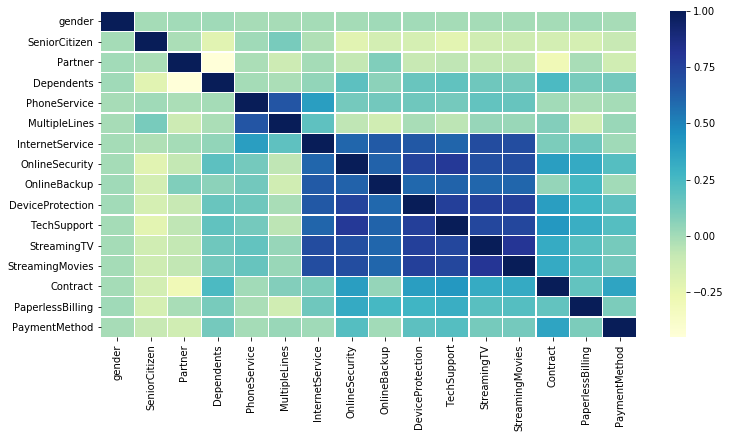

In [45]:
plt.figure(figsize=(12, 6))
df_categoricas.drop(['customerID', 'Churn', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)
corr = df_categoricas.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")


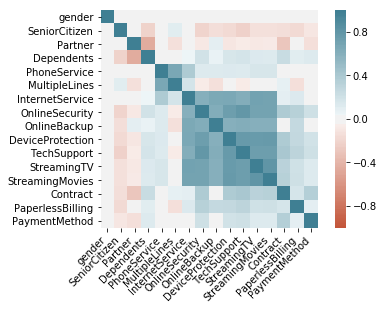

In [46]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


*   Se corrobora la hipótesis de que los servicios adicionales como InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV y StreamingMovies están correlacionados, como si se ofrecieran conjuntamente en el mismo pack.

*   Estas variables también estan correladas con Contract aunque no con la misma fortaleza

*   También tienen una fuerte correlación entre multiplelines y phone service

## Variables numéricas: Matriz de correlación



En primer lugar calcularemos la matriz de correlación y tras esto lo graficaremos para comprender su dispersión

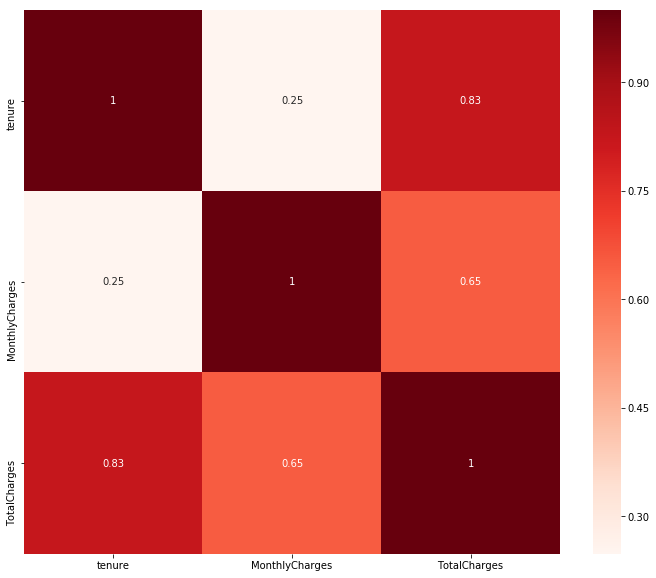

In [47]:
df_numericas = df[['MonthlyCharges','TotalCharges','tenure']]

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


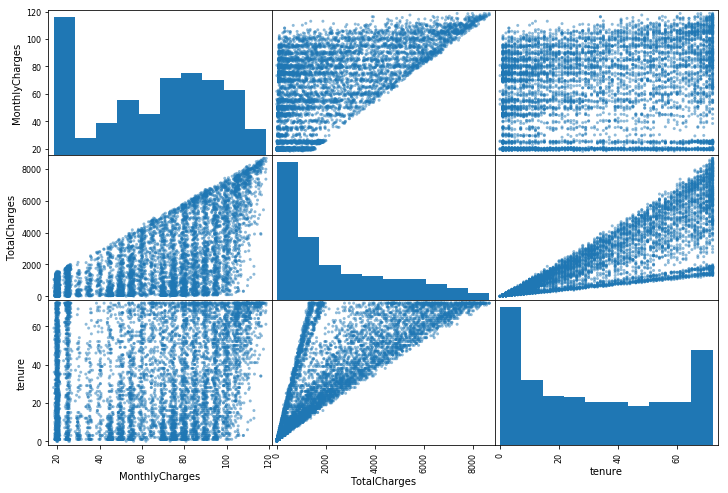

In [48]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_numericas, figsize=(12, 8))
plt.show()

# ax = sns.regplot(x = 'tenure', y = 'TotalCharges', data = df)

*   Observamos correlaciones muy fuertes entre TotalCharges y tenure, como ya nos había adelantado el histograma. 

*   Por otro lado también se encuentra relación entre TotalCharges y MonthlyCharges, esto también tiene sentido, aunque no aporta valor.

*   No se ve correlaciones fuertes entre MonthlyCharges y tenure, donde el valor es de 0.247900

# 04.Feature Importance

Para comenzar a explorar la importancia relativa de las variables, como contamos con cantidad de variables de tipo categórica, el primer paso será transformarlas para que los algoritmos que vienen a posteriori puedan procesarlas. Esta transformación la haremos creando dummies mediante el método one hot encoding. 

Para esto deberemos eliminar primero los costumerID para que no genere una columna por usuario, lo cual no tendría sentido.

Una vez implementado el método, deberemos eliminar uno de los pares de las variables dicotómicas, pues no tiene sentido tener gender_female y gender_male, pues entre sí son complementarias y sería redundante, por lo que deberíamos eliminar uno.

In [0]:
df.drop(['customerID'], axis=1, inplace=True)

params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}

# One-hot encode

df_dum = pd.get_dummies(df)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No','Dependents_No', 'PhoneService_No', 'PaperlessBilling_No', 'SeniorCitizen_0']
x, y = df_dum.drop(drop,axis=1), df_dum['Churn_Yes']


En lo sucesivo trataremos de extraer las variables importantes en base a distintos modelos:

## Extra Trees Classifier

Feature ranking:
1. feature 2 (0.143080)
2. feature 0 (0.128197)
3. feature 1 (0.119565)
4. feature 32 (0.064330)
5. feature 3 (0.037858)
6. feature 14 (0.032449)
7. feature 5 (0.031487)
8. feature 35 (0.031081)
9. feature 38 (0.030635)
10. feature 23 (0.028033)
11. feature 4 (0.026488)
12. feature 6 (0.025494)
13. feature 12 (0.025455)
14. feature 34 (0.019158)
15. feature 17 (0.018460)
16. feature 20 (0.016570)
17. feature 8 (0.015072)
18. feature 22 (0.014178)
19. feature 10 (0.014071)
20. feature 37 (0.014037)
21. feature 36 (0.013462)
22. feature 11 (0.013415)
23. feature 28 (0.013021)
24. feature 26 (0.012981)
25. feature 29 (0.012945)
26. feature 31 (0.012878)
27. feature 33 (0.012807)
28. feature 19 (0.012653)
29. feature 25 (0.011878)
30. feature 39 (0.011583)
31. feature 16 (0.011501)
32. feature 21 (0.004223)
33. feature 7 (0.003822)
34. feature 9 (0.003767)
35. feature 18 (0.003138)
36. feature 13 (0.003057)
37. feature 15 (0.001923)
38. feature 27 (0.001864)
39. feature 24

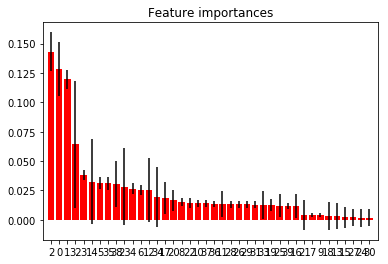

In [50]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)


forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

## Mutual Info Classif

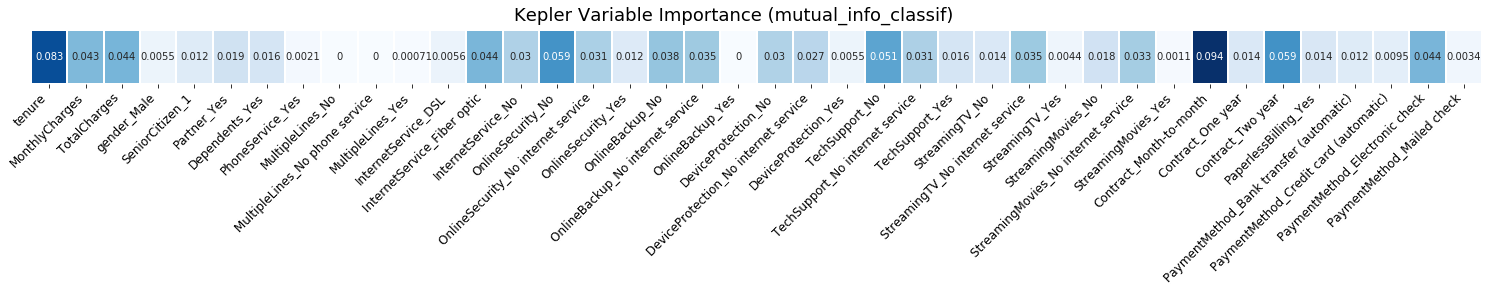

In [51]:
kepler_mutual_information = mutual_info_classif(x, y)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(kepler_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(x.columns[:], rotation=45, ha='right', fontsize=12)
plt.suptitle("Kepler Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)
pass

## Decision Tree Classifier

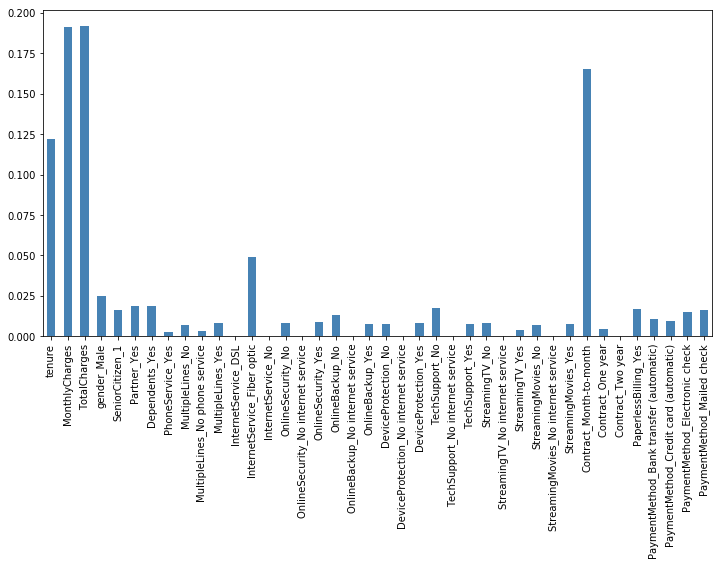

In [52]:


clf = DecisionTreeClassifier()
clf.fit(x, y)

pd.Series(clf.feature_importances_, index=x.columns[:]).plot.bar(color='steelblue', figsize=(12, 6))

Entre los tres modelos podemos extraer  conclusiones similares, dado que todos coinciden en la importancia del tenure, MonthlyCharges, Contract_Month-to-month y InternetService_Fiber optic principalmente, aunque en este punto entran en juego muchas variables.

# 05.Supervised Classification

Una vez que tenemos el dataset con dummies creado, tendremos que elaborar conjuntos de entrenamiento y clasificación como primer paso para despues poder entrenar el modelo y tener la capacidad de medir los resultados.


## Conjunto de entrenamiento y validación

Dado que el conjunto de entrenamiento no es demasiado grande lo repartiremos según 80% entrenamiento y 20% para validación. Como la variable target (Churn) es abundante en el dataset (26%) no deberíamos tener problemas para validar.

In [53]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Conjunto de entrenamiento tiene {} samples.".format(X_train.shape[0]))
print("Conjunto de validación tiene {} samples.".format(X_test.shape[0]))

Conjunto de entrenamiento tiene 5634 samples.
Conjunto de validación tiene 1409 samples.


In [0]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

## GaussianNB

Results for model GaussianNB
    Accuracy Score over test set: 0.6855926188786373
AUC: 0.81


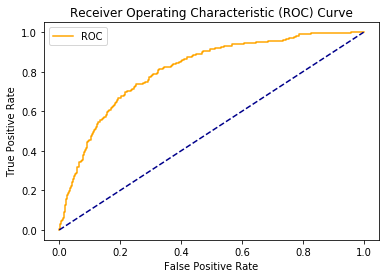

In [55]:
random_state = np.random.RandomState(0)

models = {'Decision Tree': tree.DecisionTreeClassifier(max_features=3, max_depth=2,random_state=17),
         'AdaBoost': AdaBoostClassifier(random_state=17),
         'GaussianNB': GaussianNB(),
         'LogisticRegression':LogisticRegression(),
         'XGBClassifier':XGBClassifier()}

for model_name in models:
    if model_name != 'GaussianNB': continue
    # Use train data to train the model:
    clf = models[model_name].fit(X_train, y_train)

    # Generate predictions over test set:
    predictions = clf.predict(X_test)

    # Accuracy results over test set:
    print("Results for model {0}".format(model_name))
    print("    Accuracy Score over test set:", accuracy_score(y_test.values, predictions))
#     print("    AUC Score over test set:", visuals.aroc_score(y_test.values, predictions))
          
probs = clf.predict_proba(X_test)
probs = probs[:, 1] 
auc = roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc) 
fpr, tpr, thresholds = roc_curve(y_test, probs)  
plot_roc_curve(fpr, tpr) 


## AdaBoost

Results for model AdaBoost
    Accuracy Score over test set: 0.7955997161107168
AUC: 0.83


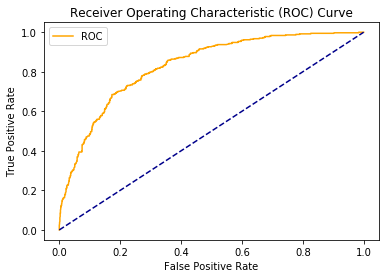

In [56]:
for model_name in models:
    if model_name != 'AdaBoost': continue
    # Use train data to train the model:
    clf = models[model_name].fit(X_train, y_train)

    # Generate predictions over test set:
    predictions = clf.predict(X_test)

    # Accuracy results over test set:
    print("Results for model {0}".format(model_name))
    print("    Accuracy Score over test set:", accuracy_score(y_test.values, predictions))
    

probs = clf.predict_proba(X_test)
probs = probs[:, 1] 
auc = roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc) 
fpr, tpr, thresholds = roc_curve(y_test, probs)  
plot_roc_curve(fpr, tpr)  

## Decision Tree

Results for model Decision Tree
    Accuracy Score over test set: 0.7388218594748048
AUC: 0.75


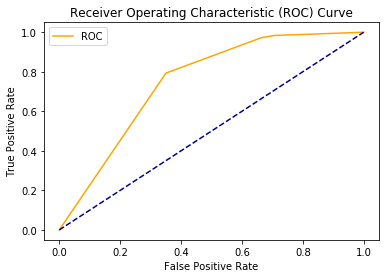

In [57]:
for model_name in models:
    if model_name != 'Decision Tree': continue
    # Use train data to train the model:
    clf = models[model_name].fit(X_train, y_train)

    # Generate predictions over test set:
    predictions = clf.predict(X_test)

    # Accuracy results over test set:
    print("Results for model {0}".format(model_name))
    print("    Accuracy Score over test set:", accuracy_score(y_test.values, predictions))
    
probs = clf.predict_proba(X_test)
probs = probs[:, 1] 
auc = roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc) 
fpr, tpr, thresholds = roc_curve(y_test, probs)  
plot_roc_curve(fpr, tpr)  

## Logistic Regresion

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Results for model LogisticRegression
    Accuracy Score over test set: 0.7991483321504613
AUC: 0.83


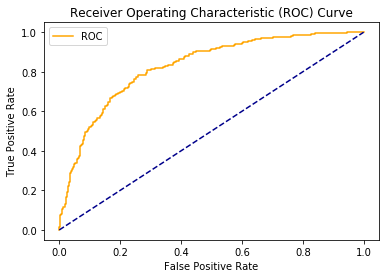

In [58]:
for model_name in models:
    if model_name != 'LogisticRegression': continue
    # Use train data to train the model:
    clf = models[model_name].fit(X_train, y_train)

    # Generate predictions over test set:
    predictions = clf.predict(X_test)

    # Accuracy results over test set:
    print("Results for model {0}".format(model_name))
    print("    Accuracy Score over test set:", accuracy_score(y_test.values, predictions))
    
probs = clf.predict_proba(X_test)
probs = probs[:, 1] 
auc = roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc) 
fpr, tpr, thresholds = roc_curve(y_test, probs)  
plot_roc_curve(fpr, tpr)



Hemos entrenado con cuatro modelos en busca de aquel que obtuviese mejores resultados. Como métricas hemos utilizado:

Accuracy que viene a ser la exactitud de un modelo, que se identifica como el porcentaje de aciertos entre el total de predicciones.

AUC: Area Under the Curve, es decir el area bajo la curva ROC, donde buscaremos que este valor adquiera la máxima magnitud. Por otro lado la curva ROC es una representación gráfica de la sensibilidad frente a la especificidad para un sistema clasificador binario, que se representa mediante el ratio de VP (Verdaderos Positivos) frente al ratio de (FP) Falsos positivos

*   GaussianNB: Accuracy =  0.685 y AUC = 0.81. Aunque el AUC tiene un valor consistente, el accuracy es relativamente bajo.
*   Decision Tree: Accuracy =  0.0.738 y AUC = 0.0.75 Son resultados aceptables pero mejorables.
*   AdaBoost: Accuracy = 0.795 y AUC = 0.83. Resultados mejorados sobre Decision Tree sin aparente overfittng
*   Logistic Regresion: Accuracy = 0.0.799 y AUC = 0.83. 

Tanto para **AdaBoos** como para **Logistic Regresion** tenemos muy buenos resultados, ligeramente superiores para **Logistic Regresion**, por lo que comenzaremos las predicciones en base a este modelo.

# 06.Predict

Puesto que tanto el accuracy como el AUC han salido tan igualados probaremos a predecir tanto con  **AdaBoos** como para **Logistic Regresion** 

## AdaBoostClassifier

In [59]:
#Cargamos el modelo LogisticRegression para predecir con el
learner = AdaBoostClassifier(random_state=17)

learner.fit(X_train, y_train)

y_pred = learner.predict(X_train)

#Calculamos la matriz de confusión y la graficamos 
print(confusion_matrix(y_train, y_pred))


# Elaboramos un pequeño reporte de la predicción
print(classification_report( y_train, y_pred))

print("LA PREDICCIÓN MEDIA CON EL MODELO LogisticRegression ES DE : ", accuracy_score(y_train, y_pred))

[[3732  401]
 [ 648  853]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      4133
           1       0.68      0.57      0.62      1501

    accuracy                           0.81      5634
   macro avg       0.77      0.74      0.75      5634
weighted avg       0.81      0.81      0.81      5634

LA PREDICCIÓN MEDIA CON EL MODELO LogisticRegression ES DE :  0.8138090166844161


## LogisticRegression

In [60]:
#Cargamos el modelo LogisticRegression para predecir con el
learner = LogisticRegression()


learner.fit(X_train, y_train)

y_pred = learner.predict(X_train)

#Calculamos la matriz de confusión y la graficamos 
print(confusion_matrix(y_train, y_pred))


# Elaboramos un pequeño reporte de la predicción
print(classification_report( y_train, y_pred))

print("LA PREDICCIÓN MEDIA CON EL MODELO LogisticRegression ES DE : ", accuracy_score(y_train, y_pred))

[[3704  429]
 [ 651  850]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4133
           1       0.66      0.57      0.61      1501

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634

LA PREDICCIÓN MEDIA CON EL MODELO LogisticRegression ES DE :  0.8083067092651757


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#07.Conclusiones

*  Una de las partes imprescindibles del notebook ha sido el EDA, claramente sin esto, es imposible tener el feeling suficiente acerca de las variables como para poder hacer predicciones o entender si tiene o no sentido las conclusiones que devuelve.


---



*  Entre otras cosas hemos podido validar como en esta compañía de telecomunicaciones hay packs que se ofertan conjuntos, esto ya lo intuiamos en el EDA pero lo confirmamos en la correlación, pues las variables InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies son ofrecidas en un mismo pack y es por ello que poseen distribuciones conjuntas por el dataset.


---



*  Se consideraba en el EDA que una variable importante iba a ser la fibra optica y esto lo ratifico el Features Importance, finalmente fue importante pero no en el grado que intuiamos, estando por delante tenure o monthlyCharges entre otras.


---



*  El dataset ha tenido la muestra suficiente de Churns como para no necesitar transformaciones adicionales, aunque claramente habría sido más óptimo para el entrenamiento contar con un dataset más amplio, pudiendo tener mayor capacidad de aprendizaje.



---



*  Se han elaborado dos modelos predictivos que consiguen métricas muy similares. Al existir menos volumen de Churn, es este tipo de usuarios al que peor predice, a pesar de esto, el modelo AdaBoost, consigue clasificar correctamente a los Churns en un 68% de las ocasioes, consiguiendo una predicción total sobre el dataset del **81.38%**  